In [1]:
%load_ext pyslim_magic

In [49]:
%%slim_stats_reps 200
// set up a single locus simulation of drift
initialize()
{
    // set the overall mutation rate
    initializeMutationRate(0);
    // m1 mutation type: neutral
    initializeMutationType("m1", 0.5, "f", 0.0);
    // g1 genomic element type: uses m1 probability 1
    initializeGenomicElementType("g1", c(m1), c(1.0));
    // uniform chromosome of length 1 site
    initializeGenomicElement(g1, 0, 0);
    // uniform recombination along the chromosome
    initializeRecombinationRate(1e-8);
}

// create a population of 100 individuals
1 {
    sim.addSubpop("p1", 100);
    // sample 100 haploid genomes 
    target = sample(p1.genomes, 100);
    // add a mutation to those genomes
    // H_0 = 0.5 here
    target.addNewMutation(m1,0, 0);
    log = sim.createLogFile("/dev/stdout", logInterval=1);
    log.addGeneration();
    log.addCustomColumn("H", "calcHeterozygosity(p1.genomes);"); 
}

// run to generation 0
300 late() {
    sim.simulationFinished();
    }


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H190,H191,H192,H193,H194,H195,H196,H197,H198,H199
generation,,,,,,,,,,,,,,,,,,,,,
1,0.49755,0.49875,0.49875,0.49020,0.49875,0.50000,0.49980,0.49955,0.49955,0.49980,...,0.49920,0.4998,0.49500,0.49155,0.49155,0.50000,0.49875,0.49875,0.49500,0.49875
2,0.49595,0.49595,0.49595,0.49020,0.49955,0.49980,0.49920,0.49875,0.49595,0.49680,...,0.49980,0.4992,0.49395,0.48380,0.47120,0.49280,0.49980,0.49995,0.49980,0.49680
3,0.50000,0.49755,0.48000,0.49500,0.49820,0.50000,0.49500,0.49955,0.49820,0.49875,...,0.49875,0.4992,0.49820,0.46875,0.48380,0.48720,0.49955,0.49955,0.49680,0.49920
4,0.49995,0.49955,0.47580,0.48875,0.48875,0.49995,0.49595,0.50000,0.49920,0.49980,...,0.49920,0.4902,0.48875,0.41180,0.46620,0.46875,0.49980,0.49980,0.49755,0.49875
5,0.49395,0.49920,0.48875,0.49500,0.47580,0.49920,0.49395,0.49955,0.48555,0.48875,...,0.49500,0.4872,0.48195,0.42000,0.47355,0.47355,0.49980,0.49955,0.49980,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.36995,0.00000,0.49920,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.46080,0.00000,0.00000,0.00000
297,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.37500,0.00000,0.50000,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.46875,0.00000,0.00000,0.00000
298,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.38955,0.00000,0.49920,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.49395,0.00000,0.00000,0.00000


In [50]:
x = _


In [51]:
# function for drift expectation
def exp_decay_drift(H0, N, gens):
    res = [H0]
    h = H0
    for i in range(gens):
        tmp = h * (1 - (1 / (2*N)))
        res.append(tmp)
        h = tmp
    return res

e = exp_decay_drift(0.5, 100, 299)

plot mean Heterozygosity across reps versus the expected value

<AxesSubplot:xlabel='generation', ylabel='heterozygosity'>

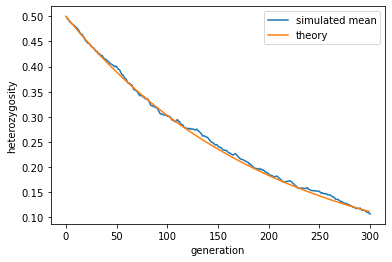

In [57]:
x.mean(axis=1).plot(ylabel="heterozygosity", label="simulated mean", legend=True)
pd.Series(e).plot(label="theory",legend="True")